In [121]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
glass=pd.read_csv("glass.csv")

In [123]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [124]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Glass types & counts')

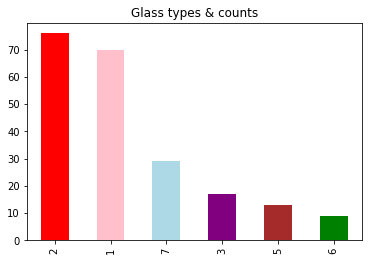

In [125]:
glass["Type"].value_counts().plot(kind='bar',colors=['Red','Pink','LightBlue','Purple','Brown','Green',])
plt.title("Glass types & counts")

# There are 6 types of glass with glass type 2 being the most common one. 

Text(0.5, 1.0, 'RI Distribution')

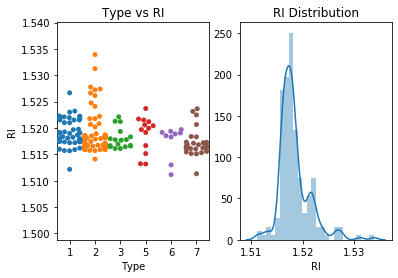

In [126]:

plt.subplots(12)
plt.subplot(121)
sns.swarmplot(x='Type',y='RI',data=glass)
plt.title("Type vs RI")
plt.subplot(122)
sns.distplot(glass['RI'])
plt.title("RI Distribution")

Text(0.5, 1.0, 'Sodium Distribution')

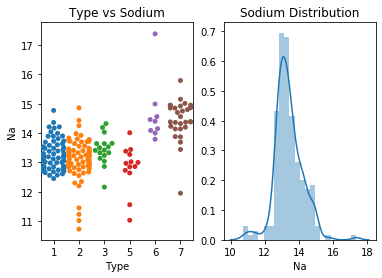

In [127]:

plt.subplots(12)
plt.subplot(121)
sns.swarmplot(x='Type',y='Na',data=glass)
plt.title("Type vs Sodium")
plt.subplot(122)
sns.distplot(glass['Na'])
plt.title("Sodium Distribution")

In [128]:
features=glass.drop('Type',axis=1)

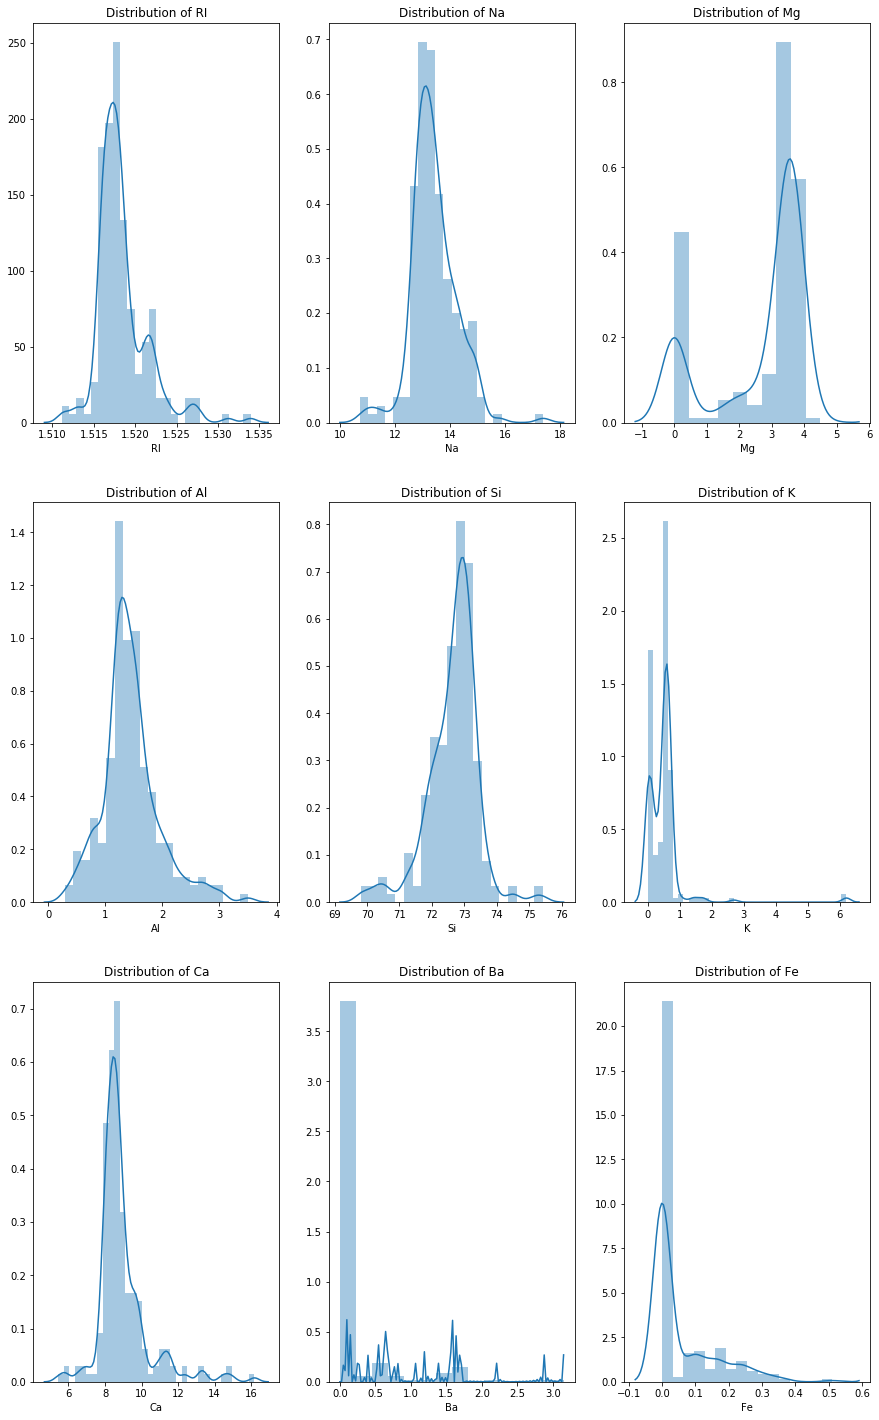

In [129]:
plt.subplots(3,3,figsize=[15,25])
i=1
for feature in features:
    plt.subplot(3,3,i)
    sns.distplot(glass[feature])
    plt.title("Distribution of "+feature)
    i=i+1

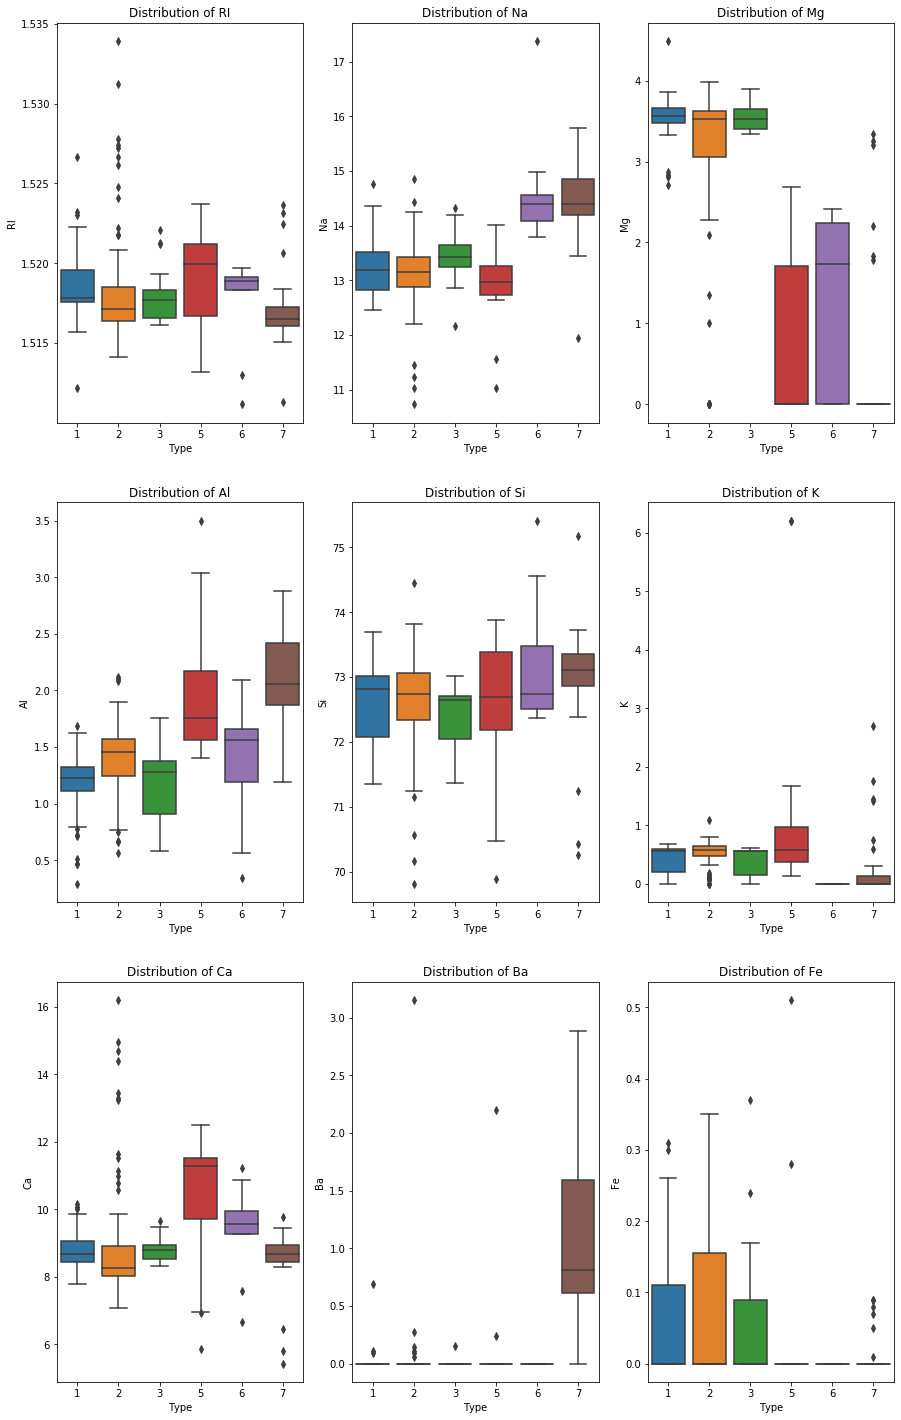

In [130]:
plt.subplots(3,3,figsize=[15,25])
i=1
for feature in features:
    plt.subplot(3,3,i)
    sns.boxplot(y=glass[feature],x=glass['Type'])
    plt.title("Distribution of "+feature)
    i=i+1

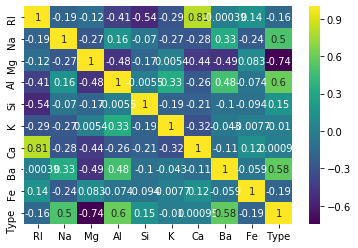

In [131]:
corr=glass.corr()
sns.heatmap(corr,cmap='viridis',annot=True)

In [133]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(features)
features=scaler.transform(features)
features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [135]:
X=features
y=glass['Type']
X_train,X_test,y_train,y_test=train_test_split(X,y)



Accuracy Score :  0.6851851851851852
              precision    recall  f1-score   support

           1       0.81      0.62      0.70        21
           2       0.67      0.60      0.63        20
           3       0.00      0.00      0.00         1
           5       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         0
           7       0.92      1.00      0.96        11

    accuracy                           0.69        54
   macro avg       0.44      0.54      0.45        54
weighted avg       0.75      0.69      0.71        54



C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


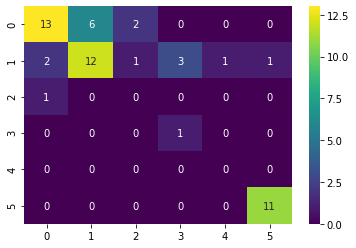

In [136]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print("Accuracy Score : ", accuracy_score(pred,y_test))
print(classification_report(pred,y_test))
sns.heatmap(confusion_matrix(pred,y_test),annot=True,cmap='viridis')

In [137]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
print("Accuracy Score : ", accuracy_score(pred,y_test))
print(classification_report(pred,y_test))

Accuracy Score :  0.6481481481481481
              precision    recall  f1-score   support

           1       0.81      0.59      0.68        22
           2       0.61      0.55      0.58        20
           3       0.00      0.00      0.00         1
           5       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         0
           7       0.83      1.00      0.91        10

    accuracy                           0.65        54
   macro avg       0.42      0.52      0.43        54
weighted avg       0.72      0.65      0.67        54



C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [138]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
pred=dc.predict(X_test)
print("Accuracy Score : ", accuracy_score(pred,y_test))
print(classification_report(pred,y_test))

Accuracy Score :  0.6666666666666666
              precision    recall  f1-score   support

           1       0.75      0.63      0.69        19
           2       0.61      0.69      0.65        16
           3       0.00      0.00      0.00         3
           5       0.75      0.60      0.67         5
           6       0.00      0.00      0.00         1
           7       0.83      1.00      0.91        10

    accuracy                           0.67        54
   macro avg       0.49      0.49      0.48        54
weighted avg       0.67      0.67      0.66        54



In [139]:
imp=dc.feature_importances_
pd.DataFrame(imp,index=features.columns,columns=['Feature Importance']).sort_values(by='Feature Importance',ascending=False).plot(kind='barh')


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       0.88      0.67      0.76        21
           2       0.56      0.77      0.65        13
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         6
           6       0.00      0.00      0.00         1
           7       0.83      1.00      0.91        10

    accuracy                           0.70        54
   macro avg       0.54      0.52      0.52        54
weighted avg       0.74      0.70      0.71        54



C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [141]:
imp=dc.feature_importances_
pd.DataFrame(imp,index=features.columns,columns=['Feature Importance']).sort_values(by='Feature Importance',ascending=False).plot(kind='barh')

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [142]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)
pred=etc.predict(X_test)
print("Classification Score : ",classification_report(pred,y_test))

Classification Score :                precision    recall  f1-score   support

           1       0.81      0.65      0.72        20
           2       0.67      0.63      0.65        19
           3       0.00      0.00      0.00         2
           5       0.25      1.00      0.40         1
           6       1.00      0.50      0.67         2
           7       0.83      1.00      0.91        10

    accuracy                           0.69        54
   macro avg       0.59      0.63      0.56        54
weighted avg       0.73      0.69      0.70        54



C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [143]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred=gbc.predict(X_test)
print("Classification Score : ",classification_report(pred,y_test))

Classification Score :                precision    recall  f1-score   support

           1       0.81      0.59      0.68        22
           2       0.61      0.61      0.61        18
           3       0.00      0.00      0.00         2
           5       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         0
           7       0.92      1.00      0.96        11

    accuracy                           0.67        54
   macro avg       0.43      0.53      0.44        54
weighted avg       0.73      0.67      0.68        54



C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [144]:
estimators=range(50,100)
max_features = ['auto', 'sqrt']
max_depth = range(4,15)
min_samples_split = range(2,8)
min_samples_leaf = range(1,8)
bootstrap = [True, False]
criterion=['gini','entropy']
random_grid = {'n_estimators':estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap,
              'criterion':criterion}

In [145]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
rf=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,verbose=1)
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.2s finished
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [146]:
best_estimate=rf.best_params_
best_estimate

{'n_estimators': 76,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 11,
 'criterion': 'entropy',
 'bootstrap': False}

In [147]:
rf2=RandomForestClassifier(**best_estimate)
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=76,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
y_pred=rf2.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78        20
           2       0.67      0.80      0.73        15
           3       0.00      0.00      0.00         3
           5       1.00      0.80      0.89         5
           6       0.00      0.00      0.00         0
           7       0.92      1.00      0.96        11

    accuracy                           0.76        54
   macro avg       0.58      0.55      0.56        54
weighted avg       0.79      0.76      0.77        54



C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 76% accuracy through random forest classifier

In [ ]:
from skl